In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.decomposition import PCA
from sklearn.metrics import *

%matplotlib inline

In [63]:
filepath='US_O365Home_PDP_Order_NoOrder_CSV.csv'

In [64]:
df = pd.read_csv(filepath)
df.head()

,MC1ID,Paid Order Exists,Try Exists,Device Orders_Office,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
0,50637eab03a94c59bb460e2e89adf021,0.0,0.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,663.333333,NaN,145.0,0.0,4.0,4.0,0.0,0.0,0.0
1,0ae3949b44364d0d9686d8022b3229f4,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,540.500000,17.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
2,bb7e2062bd4142a194eaa8818bf04169,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1514.000000,28.5,76.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c3d457532b31409da308173a867c96b5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2544.000000,21.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0bc59fdb65094105bb31a39094df49d4,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,865.000000,NaN,34.0,0.0,0.0,0.0,0.0,0.0,2.0


## EDA


In [65]:
df['Paid Order Exists'].value_counts()

0.0    1596
1.0     183
Name: Paid Order Exists, dtype: int64

In [66]:
df['Try Exists'].value_counts()

0.0    1729
1.0      50
Name: Try Exists, dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Data columns (total 19 columns):
MC1ID                                   1779 non-null object
Paid Order Exists                       1779 non-null float64
Try Exists                              1779 non-null float64
Device Orders_Office                    1779 non-null float64
Total Visits                            1779 non-null float64
New Visitors                            1779 non-null float64
Return Visitors                         1779 non-null float64
Enter PDP from Office.com               1779 non-null float64
Enter PDP from Store                    1779 non-null float64
Enter PDP from O365 Web                 1779 non-null float64
Time Spent per Visit (seconds)          1582 non-null float64
Average Time Spent on Page (seconds)    635 non-null float64
Link Clicks (e4)                        1779 non-null float64
Link Clicks on OverviewTab              1779 non-null float64
Link Clicks on TechSpecsTab

In [68]:
df.describe()

,Paid Order Exists,Try Exists,Device Orders_Office,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
count,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1582.000000,635.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000
mean,0.102867,0.028106,0.010680,1.132659,0.519955,0.480045,0.062957,0.320967,0.411467,475.342801,106.550429,22.560427,0.010118,0.041034,0.017426,0.017426,0.227094,0.170320
std,0.303870,0.165321,0.122766,0.486426,0.499742,0.499742,0.256467,0.521597,0.544327,859.000278,239.215555,43.084832,0.120502,0.325176,0.168464,0.178198,1.408686,1.255672
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,8.625000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,165.000000,22.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,571.500000,71.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,3.000000,7.000000,1.000000,1.000000,3.000000,4.000000,5.000000,11193.000000,1772.000000,950.000000,2.000000,8.000000,4.000000,4.000000,48.000000,22.000000


## Link Clicks

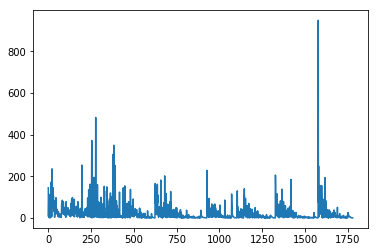

In [69]:
plt.plot(df['Link Clicks (e4)'])

In [70]:
idx =df.index[df['Link Clicks (e4)']>400]

In [71]:
idx.tolist()

[277, 1577]

In [72]:
df.drop(idx.tolist(), inplace= True)

### Time Spent per Visit (seconds)

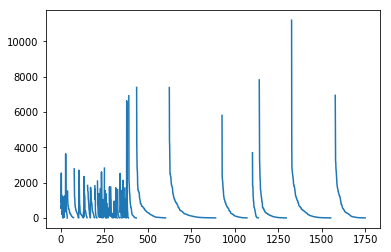

In [73]:
plt.plot(df['Time Spent per Visit (seconds)'])

In [74]:
idx =df.index[df['Time Spent per Visit (seconds)']>8000]
idx.tolist()

[1327]

In [75]:
df.drop(idx.tolist(), inplace= True)

### Average Time Spent on Page (seconds)

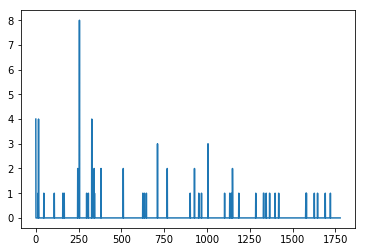

In [76]:
plt.plot(df['Link Clicks on TechSpecsTab'])

In [77]:
idx = df.index[df['Link Clicks on TechSpecsTab']>4]
idx.tolist()

[255]

In [78]:
df.drop(idx.tolist(), inplace = True)

### Link Clicks on ReviewTab

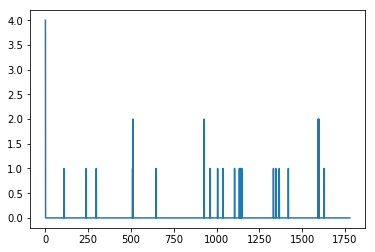

In [79]:
plt.plot(df['Link Clicks on ReviewTab'])

In [80]:
df[df['Link Clicks on ReviewTab']>2]

,MC1ID,Paid Order Exists,Try Exists,Device Orders_Office,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
0,50637eab03a94c59bb460e2e89adf021,0.0,0.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,663.333333,NaN,145.0,0.0,4.0,4.0,0.0,0.0,0.0


In [81]:
idx = df.index[df['Link Clicks on ReviewTab']>2]
df.drop(idx.tolist(), inplace = True)

### Link Clicks on FAQTab

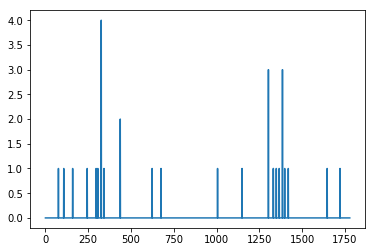

In [82]:
plt.plot(df['Link Clicks on FAQTab'])

In [83]:
idx = df.index[df['Link Clicks on FAQTab']>3]
df.drop(idx.tolist(), inplace=True)

### Link Clicks on AddtoCartButton

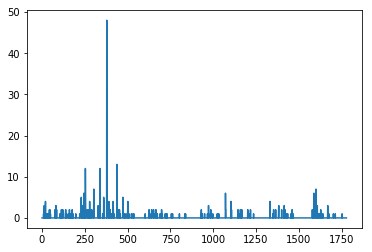

In [84]:
plt.plot(df['Link Clicks on AddtoCartButton'])

In [85]:
idx = df.index[df['Link Clicks on AddtoCartButton']>15]

In [86]:
idx.tolist()
df.drop(idx.tolist(), inplace=True)

### Count Plot

In [87]:
df.shape

(2376, 19)

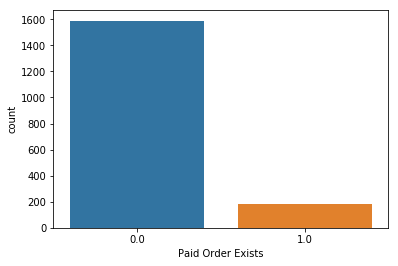

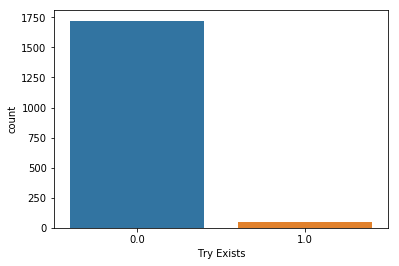

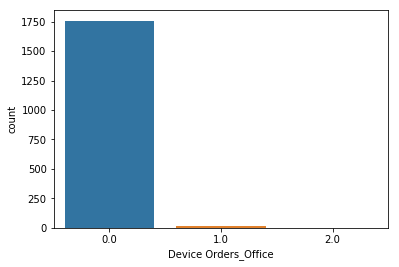

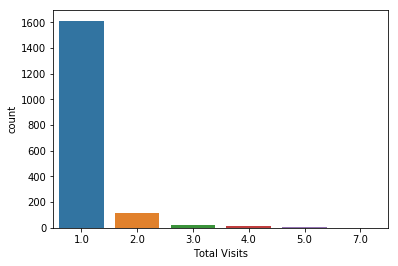

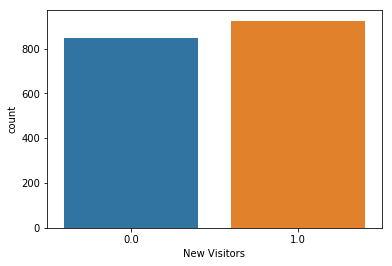

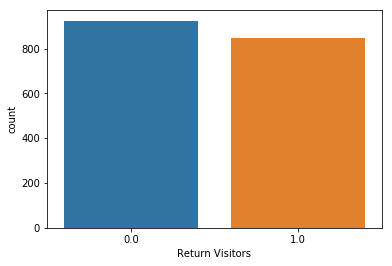

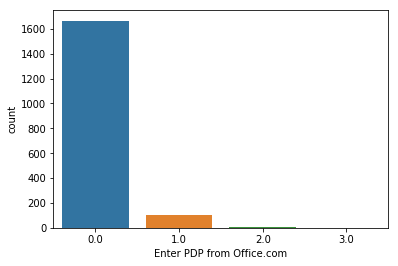

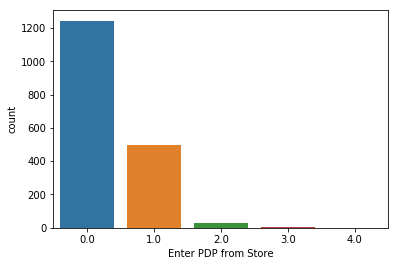

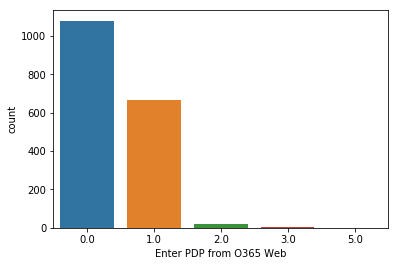

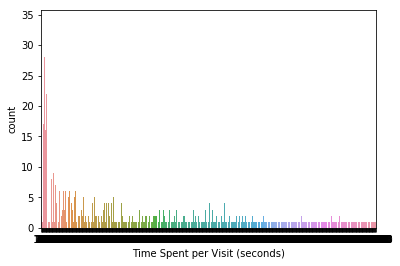

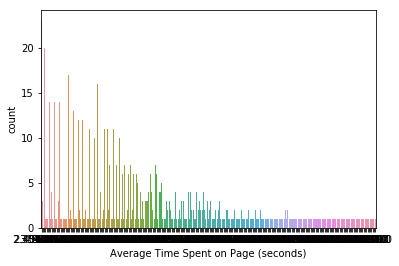

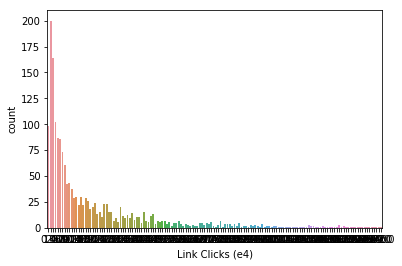

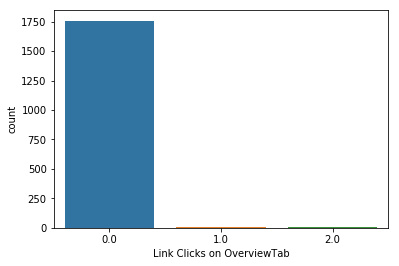

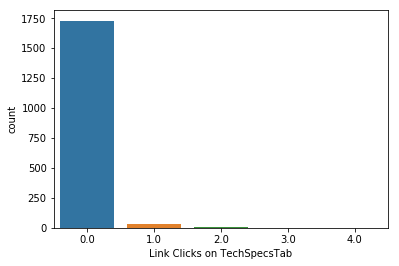

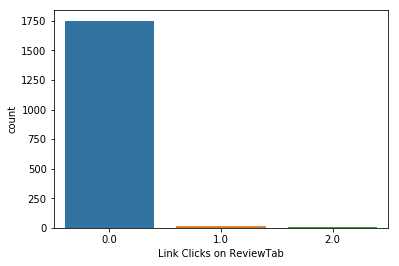

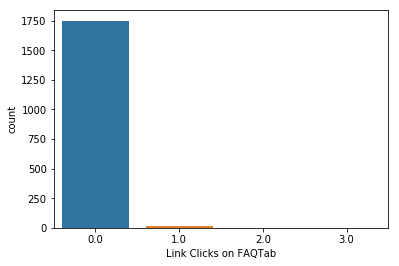

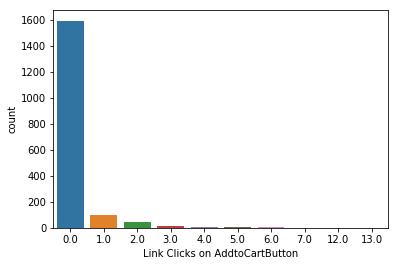

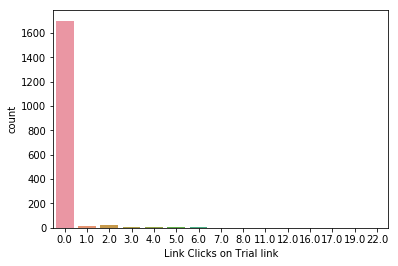

In [88]:
for c in range(1,19):
    sns.countplot(df.iloc[:,c])
    plt.show()

### Device Orders Office

In [89]:
df['Device Orders_Office'].value_counts()

0.0    1757
1.0      14
2.0       1
Name: Device Orders_Office, dtype: int64

In [90]:
idx = df.index[df['Device Orders_Office']==2]
df.drop(idx.tolist(), inplace=True)

### Total visits

In [91]:
df['Total Visits'].value_counts()

1.0    1612
2.0     118
3.0      22
4.0      14
5.0       4
7.0       1
Name: Total Visits, dtype: int64

In [92]:
idx = df.index[df['Total Visits']==7]
df.drop(idx.tolist(), inplace=True)

### Enter PDP from Office.com

In [93]:
df['Enter PDP from Office.com'].value_counts()

0.0    1663
1.0     103
2.0       3
3.0       1
Name: Enter PDP from Office.com, dtype: int64

In [94]:
idx = df.index[df['Enter PDP from Office.com']==3]
df.drop(idx.tolist(), inplace=True)

### Enter PDP from Store

In [95]:
df['Enter PDP from Store'].value_counts()

0.0    1240
1.0     497
2.0      27
3.0       4
4.0       1
Name: Enter PDP from Store, dtype: int64

In [96]:
idx = df.index[df['Enter PDP from Store']==4]
df.drop(idx.tolist(), inplace=True)

### Enter PDP from O365 Web

In [97]:
df['Enter PDP from O365 Web'].value_counts()

0.0    1076
1.0     664
2.0      22
3.0       5
5.0       1
Name: Enter PDP from O365 Web, dtype: int64

In [98]:
idx = df.index[df['Enter PDP from O365 Web']==5]
df.drop(idx.tolist(), inplace=True)

### Link Clicks on OverviewTab

In [99]:
df['Link Clicks on OverviewTab'].value_counts()

0.0    1754
1.0       9
2.0       4
Name: Link Clicks on OverviewTab, dtype: int64

### Link Clicks on TechSpecsTab

In [100]:
df['Link Clicks on TechSpecsTab'].value_counts()

0.0    1725
1.0      33
2.0       6
3.0       2
4.0       1
Name: Link Clicks on TechSpecsTab, dtype: int64

In [101]:
idx = df.index[df['Link Clicks on TechSpecsTab']==4]
df.drop(idx.tolist(), inplace=True)

### Link Clicks on ReviewTab

In [102]:
df['Link Clicks on ReviewTab'].value_counts()

0.0    1745
1.0      17
2.0       4
Name: Link Clicks on ReviewTab, dtype: int64

### Link Clicks on FAQTab

In [103]:
df['Link Clicks on FAQTab'].value_counts()

0.0    1745
1.0      18
3.0       2
2.0       1
Name: Link Clicks on FAQTab, dtype: int64

In [104]:
idx = df.index[df['Link Clicks on FAQTab']==2]
df.drop(idx.tolist(), inplace=True)

### Link Clicks on Trial link

In [105]:
df['Link Clicks on Trial link'].value_counts()

0.0     1693
2.0       27
1.0       12
3.0        8
4.0        8
6.0        4
5.0        3
8.0        2
22.0       2
7.0        1
16.0       1
19.0       1
11.0       1
12.0       1
17.0       1
Name: Link Clicks on Trial link, dtype: int64

In [106]:
idx = df.index[df['Link Clicks on Trial link']>9]
df.drop(idx.tolist(), inplace=True)

In [107]:
df.shape

(2362, 19)

In [206]:
df['Paid Order Exists'].value_counts()

0.0    1577
1.0     181
Name: Paid Order Exists, dtype: int64

In [207]:
df['Try Exists'].value_counts()

0.0    1708
1.0      50
Name: Try Exists, dtype: int64

In [108]:
# there are two entries for few MC1IDs - pull data again
# df.groupby(['MC1ID']).count()['Order Exists'] 

In [109]:
df.columns

Index(['MC1ID', 'Paid Order Exists', 'Try Exists', 'Device Orders_Office',
       'Total Visits', 'New Visitors', 'Return Visitors',
       'Enter PDP from Office.com', 'Enter PDP from Store',
       'Enter PDP from O365 Web', 'Time Spent per Visit (seconds)',
       'Average Time Spent on Page (seconds)', 'Link Clicks (e4)',
       'Link Clicks on OverviewTab', 'Link Clicks on TechSpecsTab',
       'Link Clicks on ReviewTab', 'Link Clicks on FAQTab',
       'Link Clicks on AddtoCartButton', 'Link Clicks on Trial link'],
      dtype='object')

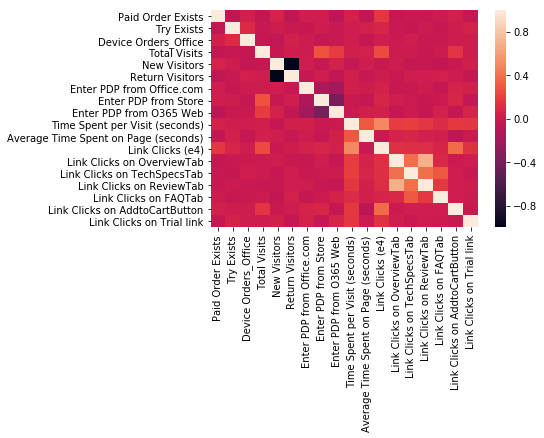

In [110]:
sns.heatmap(df.corr())

In [111]:
df_corr = df.corr()
df_corr.head()

,Paid Order Exists,Try Exists,Device Orders_Office,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
Paid Order Exists,1.000000,-0.057965,0.032821,-0.039636,0.055809,-0.055809,0.021817,0.030932,-0.073774,0.052971,-0.043049,0.159437,-0.027563,-0.011449,-0.021619,0.006951,0.039835,-0.029566
Try Exists,-0.057965,1.000000,0.100168,-0.022524,0.013730,-0.013730,-0.028686,0.014068,-0.009020,0.016682,0.039465,0.073077,-0.013920,-0.024272,0.007256,-0.016397,0.011934,0.053088
Device Orders_Office,0.032821,0.100168,1.000000,-0.024296,-0.041999,0.041999,0.003624,-0.030698,-0.008600,0.018634,-0.025955,0.017518,-0.007289,0.018584,-0.009350,-0.008587,0.011655,0.015601
Total Visits,-0.039636,-0.022524,-0.024296,1.000000,-0.030663,0.030663,0.012879,0.273853,0.181270,0.034207,0.044213,0.245701,0.000196,0.006810,-0.018591,0.001870,0.151235,0.009547
New Visitors,0.055809,0.013730,-0.041999,-0.030663,1.000000,-1.000000,0.017737,-0.021450,0.050058,-0.036734,0.023183,-0.013622,0.011127,-0.025139,-0.016692,-0.043783,-0.010593,0.036780


In [112]:
df_corr.loc[(df_corr['Paid Order Exists']>0.05) | (df_corr['Paid Order Exists']<-0.05),'Paid Order Exists']

Paid Order Exists                 1.000000
Try Exists                       -0.057965
New Visitors                      0.055809
Return Visitors                  -0.055809
Enter PDP from O365 Web          -0.073774
Time Spent per Visit (seconds)    0.052971
Link Clicks (e4)                  0.159437
Name: Paid Order Exists, dtype: float64

In [113]:
( df_corr[(df_corr>0.05) | (df_corr<-0.05)])

,Paid Order Exists,Try Exists,Device Orders_Office,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
Paid Order Exists,1.000000,-0.057965,NaN,NaN,0.055809,-0.055809,NaN,NaN,-0.073774,0.052971,NaN,0.159437,NaN,NaN,NaN,NaN,NaN,NaN
Try Exists,-0.057965,1.000000,0.100168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073077,NaN,NaN,NaN,NaN,NaN,0.053088
Device Orders_Office,NaN,0.100168,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Visits,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.273853,0.181270,NaN,NaN,0.245701,NaN,NaN,NaN,NaN,0.151235,NaN
New Visitors,0.055809,NaN,NaN,NaN,1.000000,-1.000000,NaN,NaN,0.050058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Return Visitors,-0.055809,NaN,NaN,NaN,-1.000000,1.000000,NaN,NaN,-0.050058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Enter PDP from Office.com,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.136640,-0.183215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060109,NaN
Enter PDP from Store,NaN,NaN,NaN,0.273853,NaN,NaN,-0.136640,1.000000,-0.385519,NaN,NaN,0.077212,NaN,NaN,NaN,NaN,0.074003,NaN
Enter PDP from O365 Web,-0.073774,NaN,NaN,0.181270,0.050058,-0.050058,-0.183215,-0.385519,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064922
Time Spent per Visit (seconds),0.052971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.300154,0.505755,0.185557,0.189172,0.161257,0.107710,0.167867,0.161545


## Date Preparation from Buy+Try Rows

In [210]:
df[(df['Try Exists']==1) | (df['Paid Order Exists']==1)].shape

(231, 19)

In [211]:
df_buy_try = df[(df['Try Exists']==1) | (df['Paid Order Exists']==1)]
df_buy_try.head()

,MC1ID,Paid Order Exists,Try Exists,Device Orders_Office,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
2,bb7e2062bd4142a194eaa8818bf04169,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1514.0,28.5,76.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c3d457532b31409da308173a867c96b5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2544.0,21.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0bc59fdb65094105bb31a39094df49d4,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,865.0,NaN,34.0,0.0,0.0,0.0,0.0,0.0,2.0
5,5f1827ae627a4bb79a221860eac95856,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,de1954cb3f34428999a3994f0b7d8ab9,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,229.0,NaN,10.0,0.0,0.0,0.0,0.0,0.0,0.0


In [212]:
df_buy_try.shape

(231, 19)

In [214]:
df_buy_try['Paid Order Exists'].value_counts()

1.0    181
0.0     50
Name: Paid Order Exists, dtype: int64

In [116]:
cols_to_drop=['MC1ID', 'Try Exists', 'Return Visitors','Link Clicks on OverviewTab','Link Clicks on Trial link']
df_buy_try.drop(cols_to_drop, axis=1, inplace=True)
df_buy_try.head()

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Paid Order Exists,Device Orders_Office,Total Visits,New Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton
2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1514.0,28.5,76.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2544.0,21.0,114.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,865.0,NaN,34.0,0.0,0.0,0.0,0.0
5,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0
6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,229.0,NaN,10.0,0.0,0.0,0.0,0.0


In [117]:
df_buy_try.fillna(df_buy_try.mean(), inplace=True)
df_buy_try.head()

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Paid Order Exists,Device Orders_Office,Total Visits,New Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton
2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1514.000000,28.500000,76.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2544.000000,21.000000,114.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,865.000000,86.627104,34.0,0.0,0.0,0.0,0.0
5,0.0,1.0,1.0,1.0,1.0,0.0,0.0,561.410606,86.627104,1.0,0.0,0.0,0.0,0.0
6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,229.000000,86.627104,10.0,0.0,0.0,0.0,0.0


In [183]:
df_buy_try.shape

(231, 15)

## Standard Scaler 

In [118]:
ss = StandardScaler()

np_buy_try_tranform = ss.fit_transform(df_buy_try)

data = np_buy_try_tranform.tolist()
cols_transform = df_buy_try.columns
df_buy_try_standard = pd.DataFrame(data,columns=cols_transform ) 
df_buy_try_standard.head()

,Paid Order Exists,Device Orders_Office,Total Visits,New Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton
0,0.525588,6.123724,-0.246532,-1.207248,-0.263523,-0.742172,1.355562,1.547934,-5.096758e-01,1.121995,-0.132745,-0.093454,-0.114708,-0.386565
1,0.525588,6.123724,-0.246532,-1.207248,-0.263523,-0.742172,-0.613840,3.221658,-5.754380e-01,2.201560,-0.132745,-0.093454,-0.114708,-0.386565
2,0.525588,6.123724,-0.246532,-1.207248,-0.263523,-0.742172,-0.613840,0.493325,1.246050e-16,-0.071209,-0.132745,-0.093454,-0.114708,-0.386565
3,-1.902630,6.123724,-0.246532,0.828330,3.794733,-0.742172,-0.613840,0.000000,1.246050e-16,-1.008726,-0.132745,-0.093454,-0.114708,-0.386565
4,-1.902630,6.123724,-0.246532,-1.207248,-0.263523,1.298801,-0.613840,-0.540159,1.246050e-16,-0.753039,-0.132745,-0.093454,-0.114708,-0.386565


## EDA 

In [119]:
df_buy_try_standard.shape

(231, 14)

In [120]:
df_buy_try_standard.corr()

,Paid Order Exists,Device Orders_Office,Total Visits,New Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton
Paid Order Exists,1.000000,-0.112435,0.009848,0.035385,0.095845,0.003901,-0.070709,0.025859,-8.062822e-02,0.017119,0.069769,-6.434492e-02,0.060289,0.021497
Device Orders_Office,-0.112435,1.000000,-0.040258,-0.141741,0.067419,-0.065648,0.006961,0.122814,-2.953306e-02,0.059507,-0.021677,-1.526095e-02,-0.018732,-0.063126
Total Visits,0.009848,-0.040258,1.000000,0.003476,0.001732,0.118930,0.334189,0.114828,1.116400e-01,0.555829,-0.032726,-2.303935e-02,-0.028279,0.094071
New Visitors,0.035385,-0.141741,0.003476,1.000000,0.111000,0.075210,0.005184,-0.123024,-6.203587e-02,-0.063936,-0.025150,-1.770563e-02,0.017184,-0.022471
Enter PDP from Office.com,0.095845,0.067419,0.001732,0.111000,1.000000,-0.159723,-0.161761,0.071403,6.723964e-03,0.037135,-0.034981,-2.462726e-02,-0.030228,-0.025960
Enter PDP from Store,0.003901,-0.065648,0.118930,0.075210,-0.159723,1.000000,-0.385973,-0.165602,-6.428571e-02,-0.021222,-0.030787,-6.935887e-02,-0.085133,-0.083293
Enter PDP from O365 Web,-0.070709,0.006961,0.334189,0.005184,-0.161761,-0.385973,1.000000,0.146526,3.265692e-02,0.286176,0.049230,-5.736567e-02,0.080192,0.106525
Time Spent per Visit (seconds),0.025859,0.122814,0.114828,-0.123024,0.071403,-0.165602,0.146526,1.000000,2.233583e-01,0.442795,0.015766,3.653595e-02,0.169980,0.179963
Average Time Spent on Page (seconds),-0.080628,-0.029533,0.111640,-0.062036,0.006724,-0.064286,0.032657,0.223358,1.000000e+00,-0.031544,0.005746,2.413007e-19,-0.025230,-0.106494
Link Clicks (e4),0.017119,0.059507,0.555829,-0.063936,0.037135,-0.021222,0.286176,0.442795,-3.154437e-02,1.000000,0.010346,5.042753e-02,-0.003823,0.287413


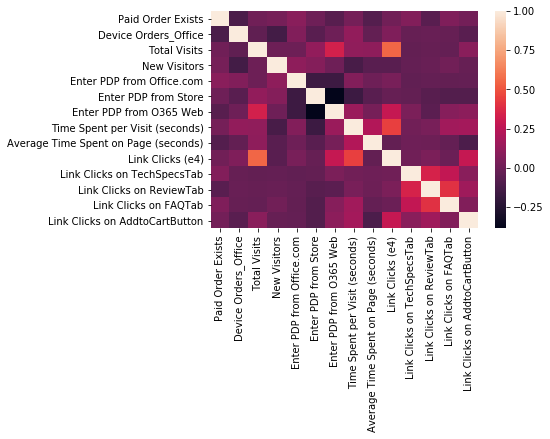

In [121]:
sns.heatmap(df_buy_try_standard.corr())

## Buy + Try PCA

Text(0, 0.5, 'cumulative explained variance')

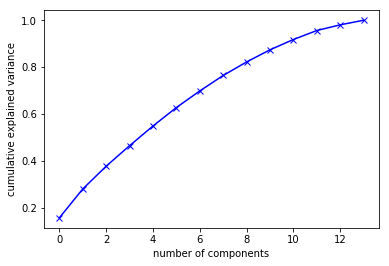

In [122]:
pca = PCA().fit(df_buy_try_standard)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bx-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

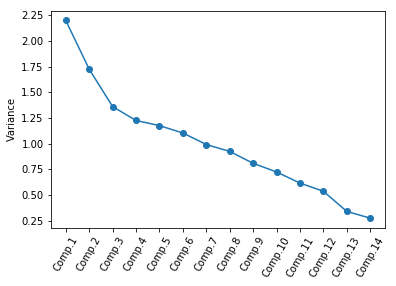

In [123]:
# https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html#deciding-how-many-principal-components-to-retain

def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, df_buy_try_standard)


In [124]:
## as per kaiser's rule take comp where variance >1 so 6 components

In [127]:
pca.components_[0]

array([-0.00567085,  0.05623307,  0.38850135, -0.10254826, -0.0077436 ,
       -0.21751648,  0.3949015 ,  0.42062466,  0.09726199,  0.51920783,
        0.13885502,  0.16825085,  0.19139805,  0.30307031])

In [129]:
pca6= PCA(n_components=6)
pca6.fit(df_buy_try_standard)
df_pca6 = pca6.transform(df_buy_try_standard)
df_pca6

array([[ 2.07899599, -0.85873268,  3.51941573, -0.11332054,  1.7876421 ,
        -2.91675406],
       [ 2.5594085 , -0.90906452,  3.48501214,  0.61192989,  3.62841733,
        -2.82518236],
       [ 0.2877332 , -0.34521836,  3.49316839, -0.08948082,  2.45686351,
        -2.51102546],
       ...,
       [-1.03127756,  0.11638454,  1.19903404, -1.41142869, -0.16070516,
        -0.34308758],
       [-1.04602805,  0.12266354,  1.2050467 , -1.41339225, -0.16624184,
        -0.34013314],
       [-1.0374291 ,  0.11696892,  1.19558624, -1.41394887, -0.16506135,
        -0.34498187]])

In [185]:
len(df_pca6)

231

## Buy + Try Elbow 1

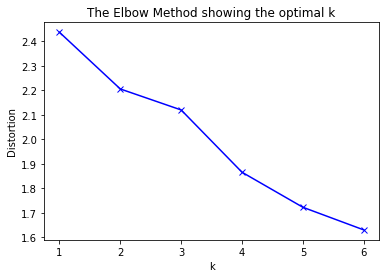

In [136]:
from sklearn import metrics
from scipy.spatial.distance import cdist

K = range(1,7)
distortions= []
for k in K:
    kmeansModel = KMeans(k)
    kmeansModel.fit(df_pca6)
    distortions.append(sum(np.min(cdist(df_pca6, kmeansModel.cluster_centers_, 'euclidean'), axis=1)) / df_pca6.shape[0])

    # Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [137]:
### K =4

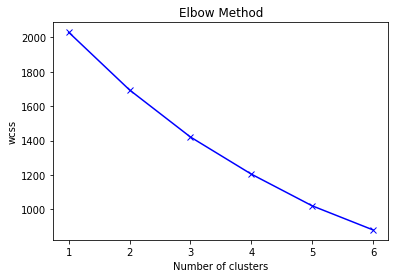

In [141]:
wcss = []
for i in range(1,7):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df_pca6)
    wcss.append(km.inertia_)
plt.plot(range(1,7),wcss, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [144]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(n_clusters=nclust,init='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    print (model.inertia_, model.score)
    return (clust_labels, cent)

#k=7
clust_labels2, cent2 = doKmeans(df_pca6, 2)
clust_labels3, cent3 = doKmeans(df_pca6, 3)
clust_labels4, cent4 = doKmeans(df_pca6, 4)
#clust_labels7, cent7 = doKmeans(df_pca, 7)
#clust_labels8, cent8 = doKmeans(df_pca, 8)

kmeans2 = pd.DataFrame(clust_labels2)
kmeans3 = pd.DataFrame(clust_labels3)
kmeans4 = pd.DataFrame(clust_labels4)


1694.5500715446817 <bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)>
1420.9912014593376 <bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)>
1205.1939049129862 <bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)>


In [161]:
df_kmeans_result= pd.DataFrame(df_pca6, columns=df_buy_try_standard.columns[:6])
df_kmeans_result['cluster2'] = kmeans2
df_kmeans_result['cluster3'] = kmeans3
df_kmeans_result['cluster4'] = kmeans4

df_kmeans_result.head()

,Paid Order Exists,Device Orders_Office,Total Visits,New Visitors,Enter PDP from Office.com,Enter PDP from Store,cluster2,cluster3,cluster4
0,2.078996,-0.858733,3.519416,-0.113321,1.787642,-2.916754,1,2,0
1,2.559409,-0.909065,3.485012,0.611930,3.628417,-2.825182,1,2,0
2,0.287733,-0.345218,3.493168,-0.089481,2.456864,-2.511025,1,2,0
3,-0.632938,-0.374258,4.139963,2.017067,1.981461,-1.863038,0,1,0
4,-0.931163,-0.486616,2.926949,-1.981343,3.065348,-2.544225,0,1,1


In [186]:
df_kmeans_result.shape

(231, 9)

In [171]:
cent2

array([[-6.48084624e-01, -1.50433514e-02, -1.23601981e-02,
         6.33003621e-05, -1.49683573e-01,  1.19001717e-02],
       [ 2.12427738e+00,  4.93087629e-02,  4.05139826e-02,
        -2.07484520e-04,  4.90629490e-01, -3.90061185e-02]])

In [248]:
df_centroid2 = pd.DataFrame(cent2, columns=df_buy_try_standard.columns[:6]) 
df_centroid2.head()

,Paid Order Exists,Device Orders_Office,Total Visits,New Visitors,Enter PDP from Office.com,Enter PDP from Store
0,-0.648085,-0.015043,-0.012360,0.000063,-0.149684,0.011900
1,2.124277,0.049309,0.040514,-0.000207,0.490629,-0.039006


In [249]:
df_centroid2.to_csv("df_centroid2.csv")

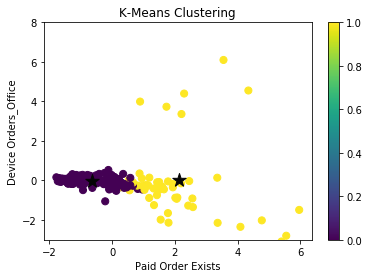

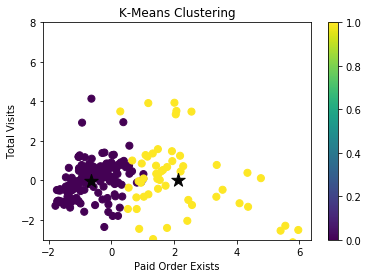

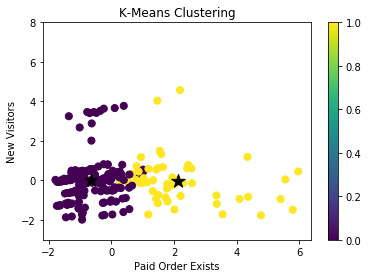

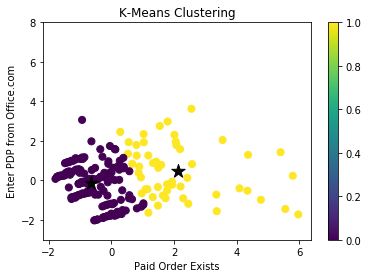

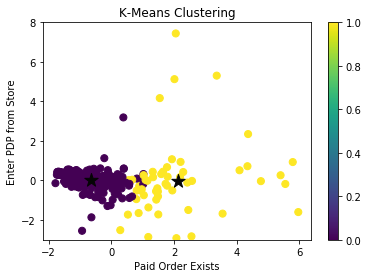

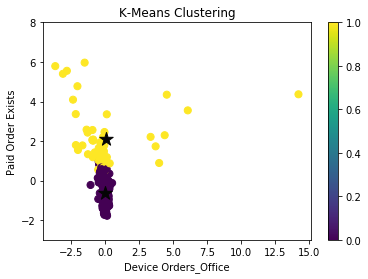

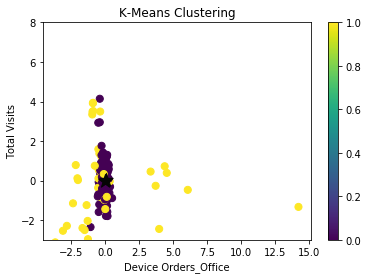

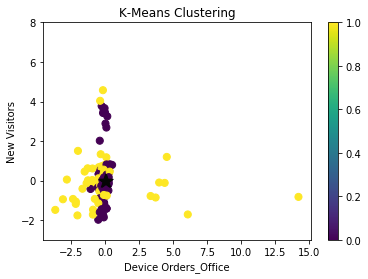

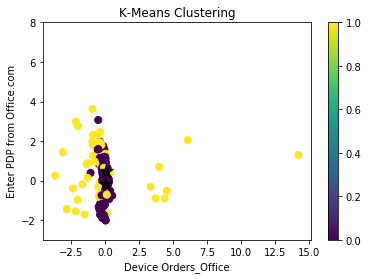

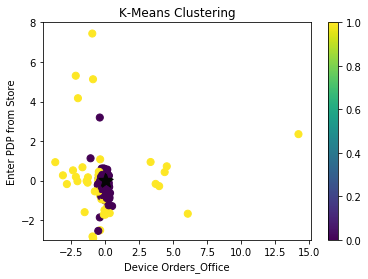

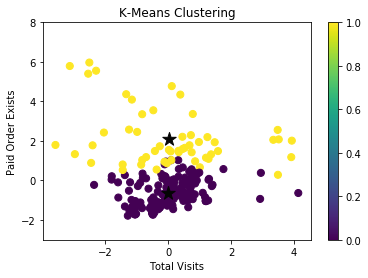

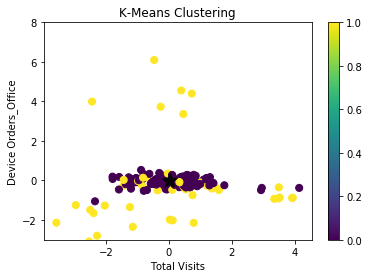

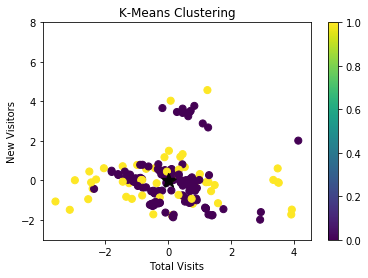

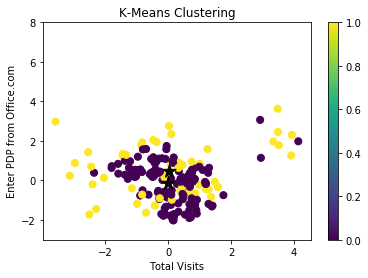

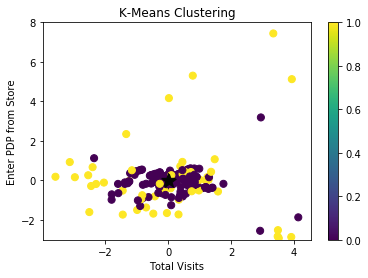

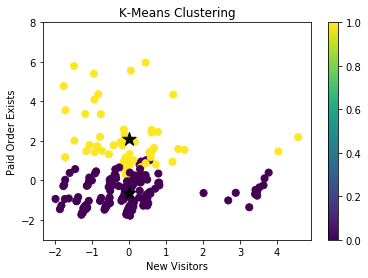

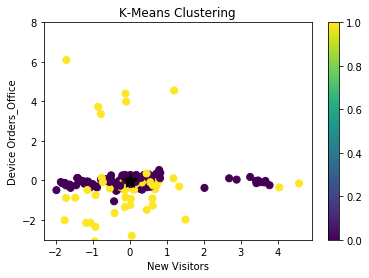

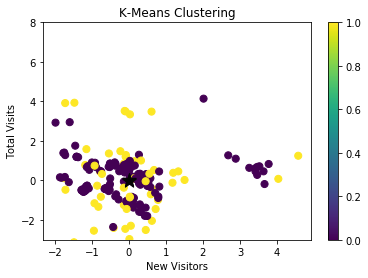

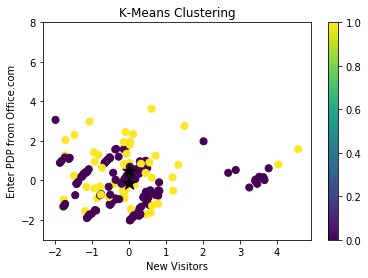

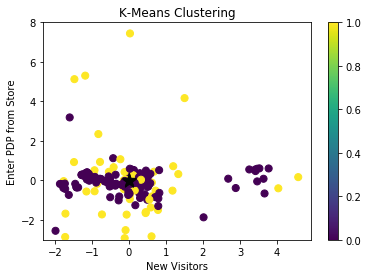

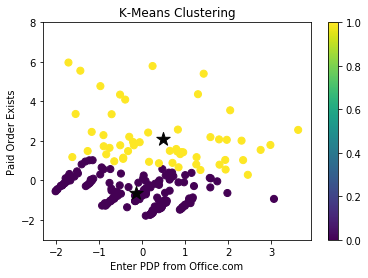

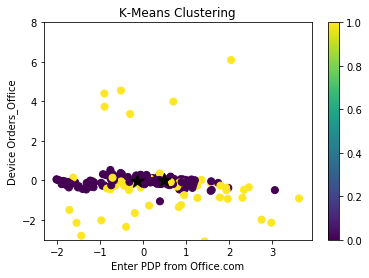

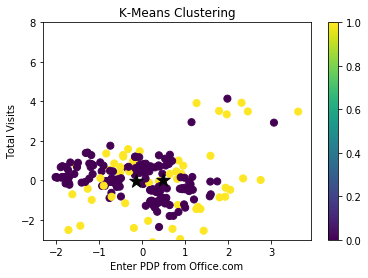

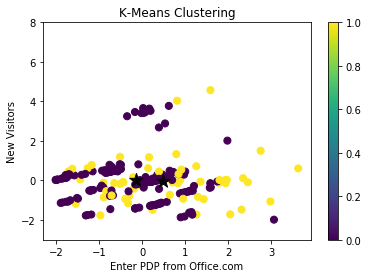

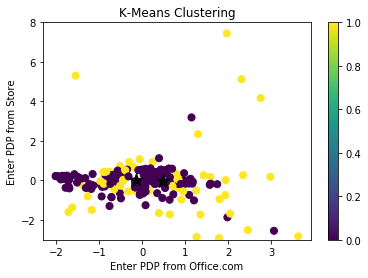

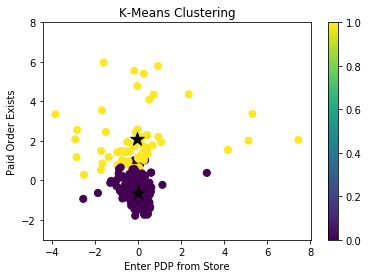

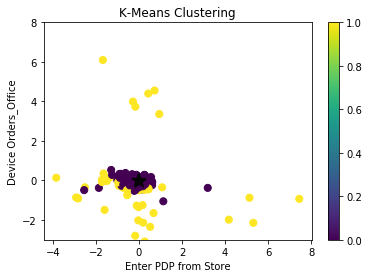

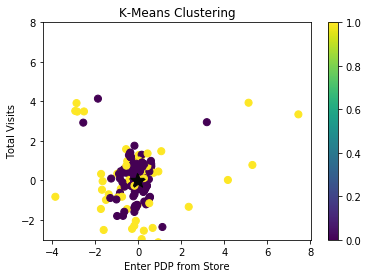

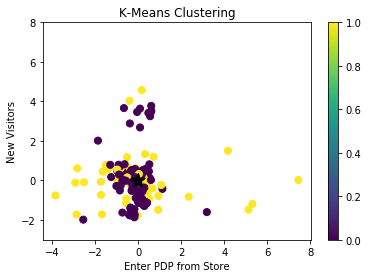

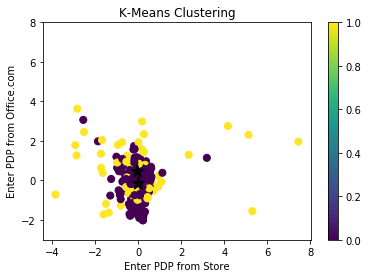

In [245]:
cols = df_kmeans_result.columns

#group = ("Paid Order", "Trial Order")

# plot from PCA
for cc in range(0,6):
    for r in range(0,6):
        if cc == r:
            continue
        fig = plt.figure()
        ax = fig.add_subplot(111)
        scatter = ax.scatter(df_kmeans_result.iloc[:,cc],df_kmeans_result.iloc[:,r],
                     c=df_kmeans_result['cluster2'],s=50)
        plt.ylim(-2, 20)
        ax.set_title('K-Means Clustering')
        ax.set_xlabel(cols[cc])
        ax.set_ylabel(cols[r])
        plt.colorbar(scatter)
        plt.scatter(cent2[:, cc], cent2[:,r], marker='*', s=200, c='#050505')
        plt.ylim(-3,8)
        

In [187]:
len(kmeans2)

231

In [188]:
df_buy_try.shape

(231, 15)

In [215]:
df_buy_try['cluster2'] = kmeans2
df_buy_try.head()

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,MC1ID,Paid Order Exists,Try Exists,Device Orders_Office,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link,cluster2
2,bb7e2062bd4142a194eaa8818bf04169,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1514.0,28.5,76.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,c3d457532b31409da308173a867c96b5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2544.0,21.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0bc59fdb65094105bb31a39094df49d4,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,865.0,NaN,34.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,5f1827ae627a4bb79a221860eac95856,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,de1954cb3f34428999a3994f0b7d8ab9,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,229.0,NaN,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [198]:
df_buy_try.index[df_buy_try['cluster2'].isna()]

Int64Index([231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242], dtype='int64')

In [199]:
df_buy_try.drop(df_buy_try.index[df_buy_try['cluster2'].isna()], inplace=True)

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [205]:
df_buy_try['cluster2'].value_counts()

0.0    176
1.0     43
Name: cluster2, dtype: int64

In [216]:
df_buy_try['cluster2_corrected'] = df_buy_try['cluster2'].apply(lambda x: 1 if x==0 else 0)
df_buy_try.head()

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,MC1ID,Paid Order Exists,Try Exists,Device Orders_Office,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,...,Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link,cluster2,cluster2_corrected
2,bb7e2062bd4142a194eaa8818bf04169,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,28.5,76.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,c3d457532b31409da308173a867c96b5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,21.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0bc59fdb65094105bb31a39094df49d4,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,34.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1
5,5f1827ae627a4bb79a221860eac95856,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
6,de1954cb3f34428999a3994f0b7d8ab9,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,NaN,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [217]:
print (metrics.classification_report(df_buy_try['Paid Order Exists'], df_buy_try['cluster2_corrected']))

              precision    recall  f1-score   support

         0.0       0.40      0.44      0.42        50
         1.0       0.84      0.82      0.83       181

   micro avg       0.74      0.74      0.74       231
   macro avg       0.62      0.63      0.62       231
weighted avg       0.75      0.74      0.74       231



In [218]:
print (metrics.confusion_matrix(df_buy_try['Paid Order Exists'], df_buy_try['cluster2_corrected']))

[[ 22  28]
 [ 33 148]]


##  Agglomertive

In [394]:
df_standard_transform.drop(['agglomerative'], axis= 1, inplace=True)

In [225]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    print (model.affinity, model.connectivity)
    return (clust_labels1)

clust_labels2 = doAgglomerative(df_pca6, 2)
clust_labels3 = doAgglomerative(df_pca6, 3)
clust_labels4 = doAgglomerative(df_pca6, 4)

euclidean None
euclidean None
euclidean None


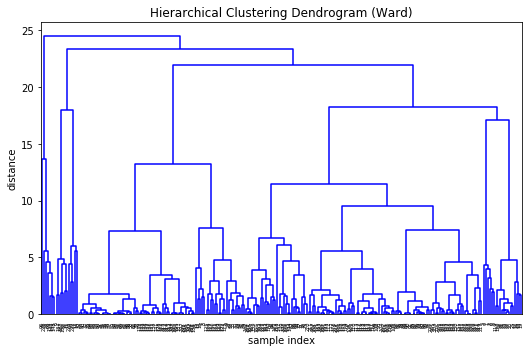

In [226]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(df_pca6, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

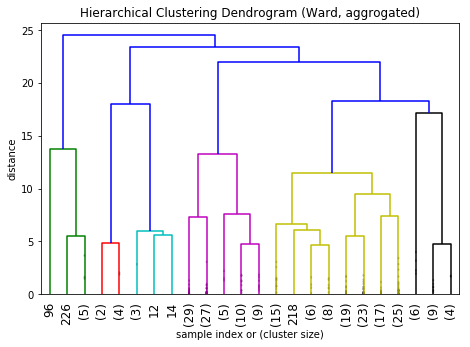

In [227]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

In [228]:
agglomerative = pd.DataFrame(clust_labels2)
df_buy_try.insert((df_buy_try.shape[1]),'agglomerative2',agglomerative)
df_buy_try.head()

df_buy_try['agglomerative2'].value_counts()

0.0    212
1.0      7
Name: agglomerative2, dtype: int64

In [230]:
df_buy_try['agglomerative2_corrected'] = df_buy_try['agglomerative2'].apply(lambda x: 1 if x ==0 else 0)
print (metrics.confusion_matrix(df_buy_try['Paid Order Exists'], df_buy_try['agglomerative2_corrected']))

[[ 13  37]
 [  6 175]]


C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [232]:
print (metrics.classification_report(df_buy_try['Paid Order Exists'], df_buy_try['agglomerative2_corrected']))

              precision    recall  f1-score   support

         0.0       0.68      0.26      0.38        50
         1.0       0.83      0.97      0.89       181

   micro avg       0.81      0.81      0.81       231
   macro avg       0.75      0.61      0.63       231
weighted avg       0.79      0.81      0.78       231



In [234]:
df_agglomerative_result= pd.DataFrame(df_pca6, columns=df_buy_try_standard.columns[:6])
df_agglomerative_result['cluster2'] = clust_labels2
df_agglomerative_result['cluster3'] = clust_labels3
df_agglomerative_result['cluster4'] = clust_labels4

df_agglomerative_result.head()

,Paid Order Exists,Device Orders_Office,Total Visits,New Visitors,Enter PDP from Office.com,Enter PDP from Store,cluster2,cluster3,cluster4
0,2.078996,-0.858733,3.519416,-0.113321,1.787642,-2.916754,0,0,0
1,2.559409,-0.909065,3.485012,0.611930,3.628417,-2.825182,0,0,0
2,0.287733,-0.345218,3.493168,-0.089481,2.456864,-2.511025,0,0,0
3,-0.632938,-0.374258,4.139963,2.017067,1.981461,-1.863038,0,0,0
4,-0.931163,-0.486616,2.926949,-1.981343,3.065348,-2.544225,0,0,0


C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


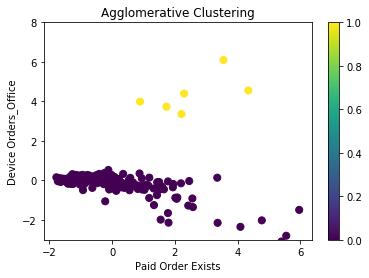

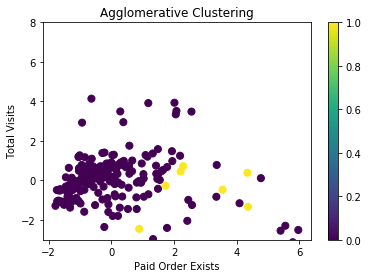

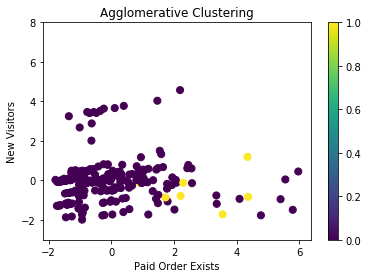

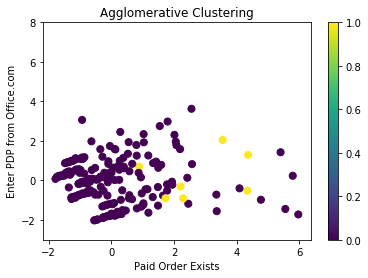

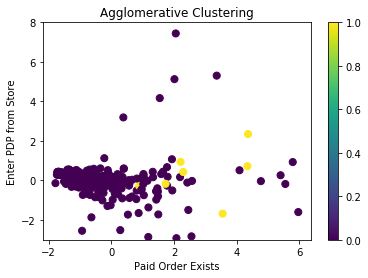

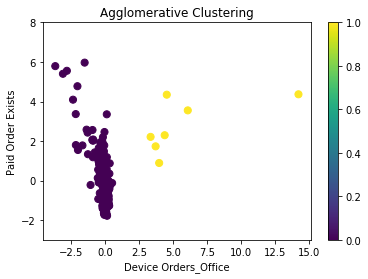

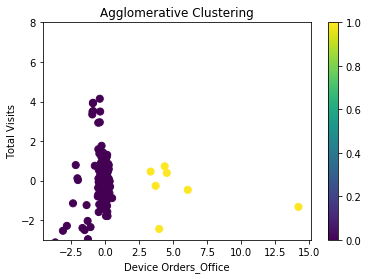

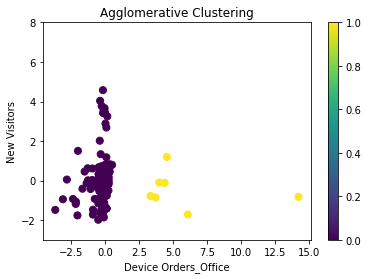

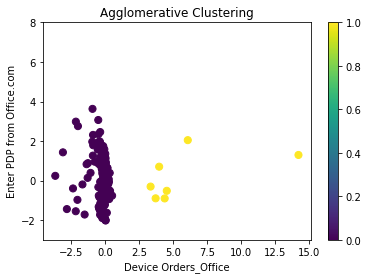

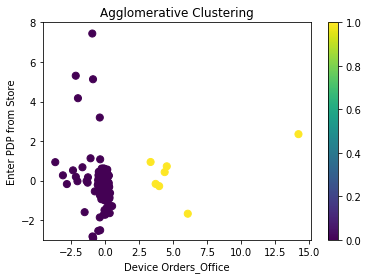

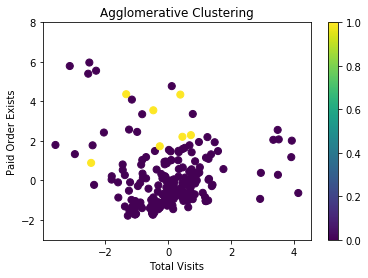

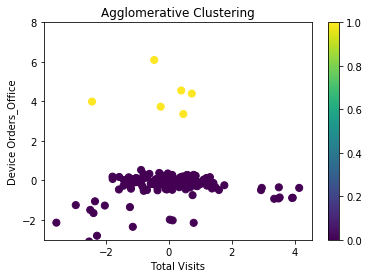

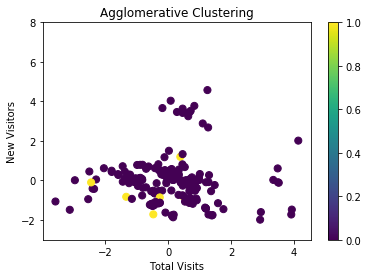

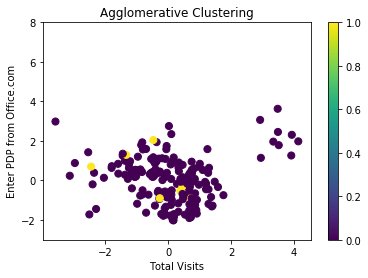

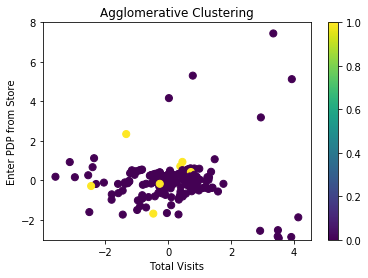

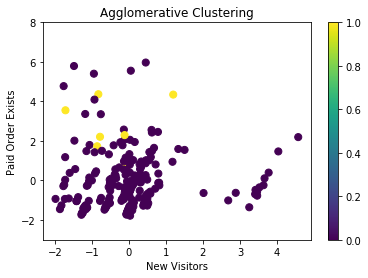

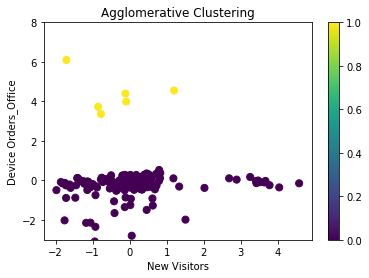

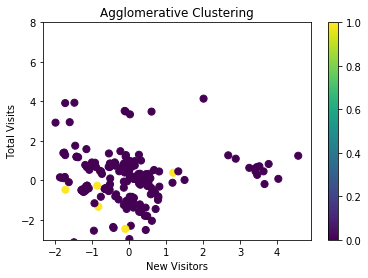

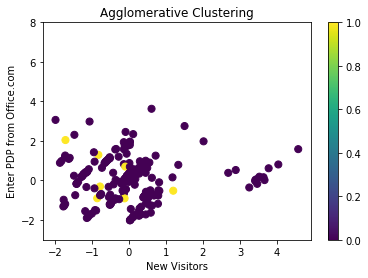

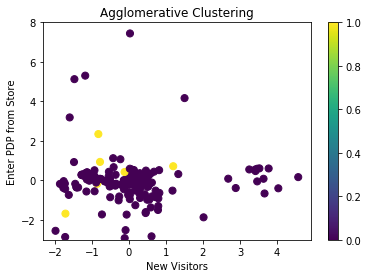

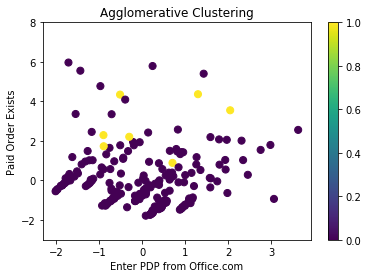

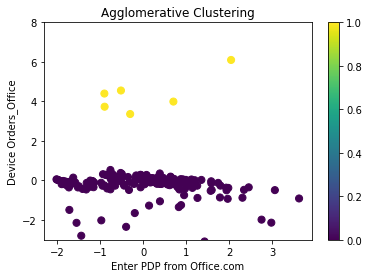

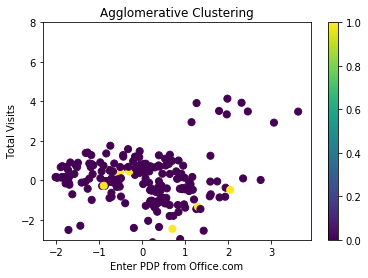

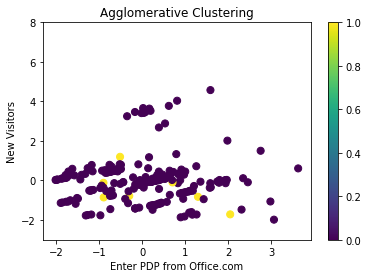

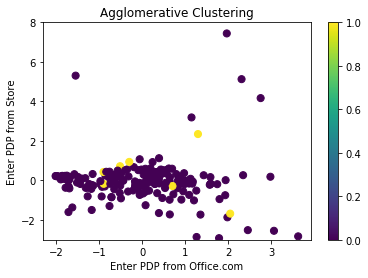

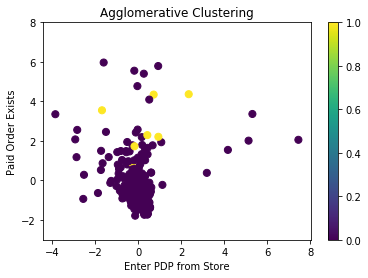

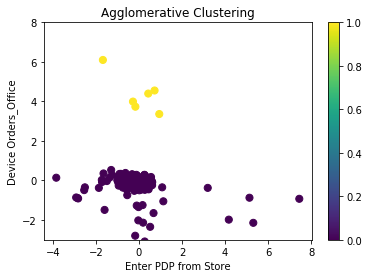

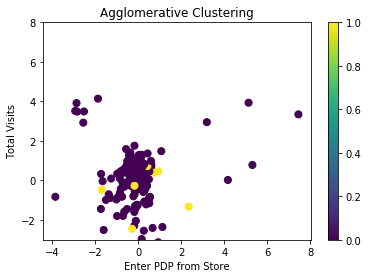

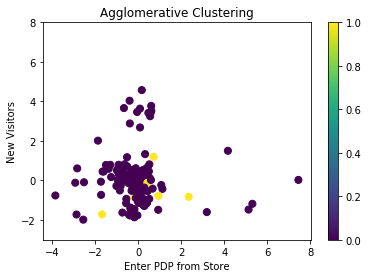

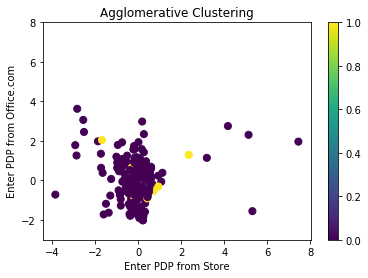

In [235]:
cols = df_agglomerative_result.columns

# plot from PCA
for cc in range(0,6):
  for r in range(0,6):
        if cc == r:
            continue
        fig = plt.figure()
        ax = fig.add_subplot(111)
        scatter = ax.scatter(df_agglomerative_result.iloc[:,cc],df_agglomerative_result.iloc[:,r],
                     c=df_agglomerative_result['cluster2'],s=50)
        plt.ylim(-2, 20)
        ax.set_title('Agglomerative Clustering')
        ax.set_xlabel(cols[cc])
        ax.set_ylabel(cols[r])
        plt.colorbar(scatter)
        plt.ylim(-3,8)

In [236]:
df_buy_try.head()

,MC1ID,Paid Order Exists,Try Exists,Device Orders_Office,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,...,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link,cluster2,cluster2_corrected,agglomerative,agglomerative_corrected,agglomerative2,agglomerative2_corrected
2,bb7e2062bd4142a194eaa8818bf04169,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0,0.0,1,0.0,1
3,c3d457532b31409da308173a867c96b5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,1,0.0,1
4,0bc59fdb65094105bb31a39094df49d4,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,1,0.0,1,0.0,1
5,5f1827ae627a4bb79a221860eac95856,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0.0,1,0.0,1
6,de1954cb3f34428999a3994f0b7d8ab9,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0.0,1,0.0,1
